In [217]:
from torch.utils.data import Dataset, DataLoader
import torch
import numpy as np
import math

class load_whole_data(Dataset): 
    """
    This dataloader loads the tensor input and target in whole
    """
    def __init__(self, path: str, ind: list):
        """
        Args:
            path (str): path to the input & target folder.
            ind (list): list of indices for which pictures to load.
            device (class 'torch.device'): which pytorch device the data should
            be sent to.
        """

        self.device = "cpu"
        self.imgs_path = path
        self.data = []
        for i in ind:
            self.data.append([self.imgs_path + f"/model_input ({i}).pt",
                        self.imgs_path + f"/model_target ({i}).pt"])

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        input_path, target_path = self.data[idx] # path for target + input

        inp = torch.load(input_path) # load the input data
        inp = inp.type(torch.float).to(self.device)

        tar = torch.load(target_path) # load the target data
        tar = tar.type(torch.float).to(self.device)

        return inp, tar



        
class load_shuffle_5_min(Dataset): 
    """
    This dataloader loads the tensor input and target in whole
    """
    def __init__(self, ls: list, device):
        """
        Args:
            path (str): path to the input & target folder.
            ind (list): list of indices for which pictures to load.
            device (class 'torch.device'): which pytorch device the data should
            be sent to.
        """

        self.device = device
        self.ls = ls # list with the input and target data
        self.size = (ls[0][0].shape[0], ls[0][0].shape[1]) # size of target and input
        
        length = math.floor((self.size[1]/(250*60*5)))*self.size[0] # the amount of total possible cuts
        self.length = int(min((75 - 75 % self.size[0]), length))
        
        self.gen = iter(self.create_data(self.length))
        
        #print(self.length)

    

    def create_data(self, nr_of_cuts):       
        cut_point = np.random.randint(low = 250*60*0.5, high = self.size[1] - 250*60*5, 
                          size = nr_of_cuts) # choose the place to cut
        
        cuts_pr_chan = nr_of_cuts/self.size[0] # the amount of cuts pr channel
        
        for i in range(nr_of_cuts):
            inp = self.ls[0][0][int(i//cuts_pr_chan)][cut_point[i]:cut_point[i]+60*250*5]
            tar = self.ls[1][0][int(i//cuts_pr_chan)][cut_point[i]:cut_point[i]+60*250*5]
            yield (inp, tar)
    
    def __len__(self):
        return self.length

    def __getitem__(self, idx):
        inp, tar = next(self.gen)
        inp = inp.to(self.device)
        tar = tar.to(self.device)
        return inp, tar

    
    
class load_shuffle_5_min_all(Dataset): 
    """
    This dataloader loads the tensor input and target in whole
    """
    def __init__(self, ls: list, device):
        """
        Args:
            path (str): path to the input & target folder.
            ind (list): list of indices for which pictures to load.
            device (class 'torch.device'): which pytorch device the data should
            be sent to.
        """

        self.device = device
        self.ls = ls # list with the input and target data
        self.size = (ls[0][0].shape[0], ls[0][0].shape[1]) # size of target and input
        
        self.length = math.floor((self.size[1]/(250*60*5)))*self.size[0] # the amount of total possible cuts

        
        self.gen = iter(self.create_data(self.length))
        #print(self.length)

    

    def create_data(self, nr_of_cuts):       
        cut_point = np.random.randint(low = 250*60*0.5, high = self.size[1] - 250*60*5, 
                          size = nr_of_cuts) # choose the place to cut
        
        cuts_pr_chan = nr_of_cuts/self.size[0] # the amount of cuts pr channel
        
        for i in range(nr_of_cuts):
            inp = self.ls[0][0][int(i//cuts_pr_chan)][cut_point[i]:cut_point[i]+60*250*5]
            tar = self.ls[1][0][int(i//cuts_pr_chan)][cut_point[i]:cut_point[i]+60*250*5]
            yield (inp, tar)
    
    def __len__(self):
        return self.length

    def __getitem__(self, idx):
        inp, tar = next(self.gen)
        inp = inp.to(self.device)
        tar = tar.to(self.device)
        return inp, tar


In [203]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

trainload = load_whole_data(path = "C:/Users/Marc/Desktop/model_data", ind = [i for i in range(1, 283 + 1)])
batch_size = 1

# Set up the dataloaders:

trainloader = torch.utils.data.DataLoader(trainload,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          num_workers=0)
load = iter(trainloader)

loader2 = load_shuffle_5_min(next(load), "cpu")
batch_size = 1

# Set up the dataloaders:

loader2 = torch.utils.data.DataLoader(loader2,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          num_workers=0)

load2 = iter(loader2)

j = 0
for i in loader2:
    j += 1

print("j =", j)

cuda
j = 40


In [168]:
import time


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

trainload = load_whole_data(path = "C:/Users/Marc/Desktop/model_data", ind = [i for i in range(1, 283 + 1)])

# Set up the dataloaders:

trainloader = torch.utils.data.DataLoader(trainload,
                                          batch_size=1,
                                          shuffle=False,
                                          num_workers=0)

data = []

nr_of_files_loaded = 0

batch_size = 1

start = time.time()

for file in trainloader:
    loader2 = load_shuffle_5_min(file, device)
    loader2 = torch.utils.data.DataLoader(loader2,
                                              batch_size=batch_size,
                                              shuffle=True,
                                              num_workers=0)
    nr_of_files_loaded += 1
    j = 0
    for i in loader2:
        j += 1
    
    data.append(j)

print("time:", time.time()-start)
    
print("Number of files loaded in total:", nr_of_files_loaded)

cuda
time: 31.01079511642456
Number of files loaded in total: 283


In [223]:
import time


device = "cpu"
print(device)

trainload = load_whole_data(path = "C:/Users/Marc/Desktop/model_data", ind = [i for i in range(1, 283 + 1)])

# Set up the dataloaders:

trainloader = torch.utils.data.DataLoader(trainload,
                                          batch_size=1,
                                          shuffle=False,
                                          num_workers=0)

data_after = []

nr_of_files_loaded = 0

batch_size = 1

start = time.time()

for file in trainloader:
    loader2 = load_shuffle_5_min(file, device)
    loader2 = torch.utils.data.DataLoader(loader2,
                                              batch_size=batch_size,
                                              shuffle=True,
                                              num_workers=0)
    nr_of_files_loaded += 1
    j = 0
    for i in loader2:
        j += 1
    
    data_after.append(j)

print("time:", time.time()-start)
    
print("Number of files loaded in total:", nr_of_files_loaded)

cpu
time: 26.296545028686523
Number of files loaded in total: 283


Lets do the data analysis before we did the corrections:

In [224]:
import time


device = "cpu"
print(device)

trainload = load_whole_data(path = "C:/Users/Marc/Desktop/model_data", ind = [i for i in range(1, 283 + 1)])

# Set up the dataloaders:

trainloader = torch.utils.data.DataLoader(trainload,
                                          batch_size=1,
                                          shuffle=False,
                                          num_workers=0)

data_before = []

nr_of_files_loaded = 0

batch_size = 1

start = time.time()

for file in trainloader:
    loader2 = load_shuffle_5_min_all(file, device)
    loader2 = torch.utils.data.DataLoader(loader2,
                                              batch_size=batch_size,
                                              shuffle=True,
                                              num_workers=0)
    nr_of_files_loaded += 1
    j = 0
    for i in loader2:
        j += 1
    
    data_before.append(j)

print("time:", time.time()-start)
    
print("Number of files loaded in total:", nr_of_files_loaded)

cpu
time: 26.10477352142334
Number of files loaded in total: 283


77.76678445229682
76.0


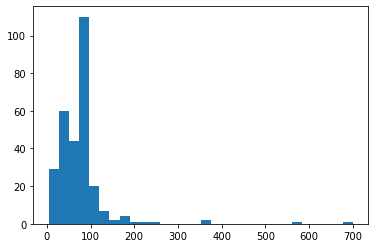

In [225]:
import matplotlib.pyplot as plt
m = plt.hist(data_before, bins = 30)

print(np.mean(data_before))
print(np.median(data_before))

54.667844522968196
66.0


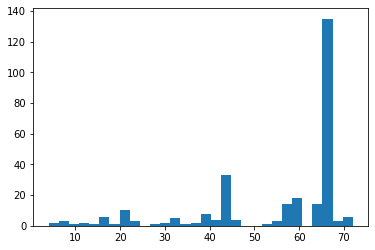

In [226]:
import matplotlib.pyplot as plt
m = plt.hist(data_after, bins = 30)

print(np.mean(data_after))
print(np.median(data_after))